# Spam Classifier ##

In this mission we will be using the Naive Bayes algorithm to create a model that can classify [dataset](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) SMS messages as spam or not spam, based on the training we give to the model.

## Overview

   This project has been broken down in to the following steps: 

**1. Step 1: introduction** 
   * Import the dataset
   * Rename the column
   * Print the first five values
   
**2. Step 2: Data cleaning**
   * Convert the values in the 'label' column to numerical values
   * Get size of the dataset
   * Convert all strings to lower case
   * Removing all punctuations
   * Tokenization
   * Count frequencies
   
**3. Step 3: Data cleaning from scratch**
   * Import the `sklearn.feature_extraction.text.CountVectorizer`
   * Fit dataset
   * Create a matrix and convert to array
   * Convert the array into a dataframe
   * Set the column names with name words
   
**4. Step: Training and testing sets**
   * Split the dataset into a training and testing set
   * Naive Bayes implementation using scikit-learn
   
**5. Step: Evaluating our model**


>** Part 1 - Instructions: **
* Import the dataset into a pandas dataframe.
* Rename the column names.
* Print the first five values.

In [2]:
#Import the dataset into a pandas dataframe using the read_table method.
import pandas as pd

# Rename the column names by specifying a list 
# ['label, 'sms_message'] to the 'names' argument of read_table().
df = pd.read_table('/home/brunocampos01/projetos/data_science/machine_learning/'
                        'supervised_learning/data_base/smsspamcollection/SMSSpamCollection', 
                   names=['label', 'sms_message'])

# Print the first five values of the dataframe with the new column names.
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Preprocessing #

Now that we have a basic understanding of what our dataset looks like, lets convert our labels to binary variables:
* 0 to represent 'ham'(i.e. not spam) 
* 1 to represent 'spam' for ease of computation. 

You might be wondering why do we need to do this step? The answer to this lies in how scikit-learn handles inputs. Scikit-learn only deals with numerical values and hence if we were to leave our label values as strings, scikit-learn would do the conversion internally(more specifically, the string labels will be cast to unknown float values).
***
*Você pode estar se perguntando por que precisamos fazer este passo? A resposta para isso está em como o scikit-learn manipula entradas. O Scikit-learn lida apenas com valores numéricos e, portanto, se deixássemos nossos valores de rótulo como strings, o scikit-learn faria a conversão internamente (mais especificamente, os rótulos de string serão convertidos em valores flutuantes desconhecidos).*

>**Part 2 - Instructions: **
* **Convert the values in the 'label' column to numerical values** using map method as follows:
{'ham':0, 'spam':1} This maps the 'ham' value to 0 and the 'spam' value to 1.
* Print out number of rows and columns.

In [3]:
# Convert the values in the 'label'
dict =  {'ham':0, 'spam':1}

# mapped collumn to dict 
df ['label'] = df.label.map(dict)

# print out number of rows and columns using 'shape'.
df.shape

print(df.head())

   label                                        sms_message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


### Bag of words ###
Most ML algorithms rely on numerical data to be fed into them as input, and email messages are usually text.

The basic idea of BoW is to take a piece of text and count the frequency of the words in that text. It is important to note that the BoW concept treats each word individually and the order in which the words occur does not matter.

###### Matrix words (tokens)
We can convert a collection of documents to a matrix. A row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrence of each word or token in that document.

Lets say we have 4 documents as follows:

`['Hello, how are you!',
'Win money, win from home.',
'Call me now',
'Hello, Call you tomorrow?']`

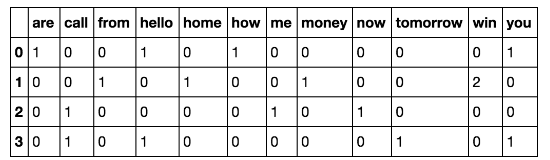

In [278]:
from IPython.display import Image
Image('/home/brunocampos01/projetos/data_science/images/bayes_spam.png')

Lets break this down and see how we can do this conversion using a small set of documents.

To handle this, we will be using sklearns 
[count vectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) method which does the following:

* It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
* It counts the occurrence of each of those tokens.
***
Para lidar com isso, usaremos o método vectorizador de contagem sklearns, que faz o seguinte:

* Ele tokeniza a string (separa a string em palavras individuais) e dá um ID inteiro a cada token.
* Conta a ocorrência de cada um desses tokens.
***

** Please Note: ** 

* `lowercase`: The CountVectorizer method automatically converts all tokenized words to their lower case. It does this using the `lowercase` parameter which is by default set to `True`.

* `token_pattern`: It also ignores all punctuation.

* `stop_words` Stop words refer to the most commonly used words in a language.By setting this parameter value to `english`, CountVectorizer will automatically ignore all words(from our input text) that are found in the built in list of english stop words in scikit-learn. This is extremely helpful as stop words can skew our calculations when we are trying to find certain key words that are indicative of spam.
***


>**Part 3 - Instructions: **
* Convert all the strings in the documents set to their lower case. Save them into a list called 'lower_case_documents'. You can convert strings to their lower case in python by using the lower() method.


In [279]:
# Convert all strings to lower case
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']
lower_case_documents = []

for word in documents:
    lower_case_documents.append(word.lower())
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


>**Part 4 - Instructions: **
* Remove all punctuation from the strings in the document set. Save them into a list called 
'sans_punctuation_documents'. 

In [280]:
# Removing all punctuations
import string

sans_punctuation_documents = []

for word in lower_case_documents:
    # method translate: str.translate(table[, deletechars]);
    word_translate = word.translate(str.maketrans('', '', string.punctuation))
    sans_punctuation_documents.append(word_translate)
print(sans_punctuation_documents)

['hello how are you', 'win money win from home', 'call me now', 'hello call hello you tomorrow']


>**Part 5 - Instructions:**
* Tokenize the strings stored in 'sans_punctuation_documents' using the split() method. and store the final document set 
in a list called 'preprocessed_documents'.

In [281]:
# Tokenization
preprocessed_documents = []

for word in sans_punctuation_documents:
    tk = word.split()
    preprocessed_documents.append(tk)
print("Preprocessed documents: \n", preprocessed_documents)

Preprocessed documents: 
 [['hello', 'how', 'are', 'you'], ['win', 'money', 'win', 'from', 'home'], ['call', 'me', 'now'], ['hello', 'call', 'hello', 'you', 'tomorrow']]


>**Part 6 - Instructions:**
* Using the **Counter()** (import collections) method and preprocessed_documents as the input, create a dictionary with the keys being each word in each document and the corresponding values being the frequency of occurrence of that word. Save each Counter dictionary as an item in a list called 'frequency_list'.

In [282]:
# Count frequencies
import pprint
from collections import Counter

frequency_list = []

for word in preprocessed_documents:
    # Counter() insert once word in dict with counter
    frequency_count = Counter(word)
    frequency_list.append(frequency_count)
        
pprint.pprint("Count words: {}".format(frequency_list))
print()


("Count words: [Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}), "
 "Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}), Counter({'call': 1, "
 "'me': 1, 'now': 1}), Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': "
 '1})]')



### Bag of words in scikit-learn###

>**Part 7 - Instructions:**
Import the sklearn.feature_extraction.text.CountVectorizer method and create an instance of it called 'count_vector'. 

In [283]:
from sklearn.feature_extraction.text import CountVectorizer

documents = ['Hello, how are you!',
                'Win money, win from home.',
                'Call me now.',
                'Hello, Call hello you tomorrow?']

count_vector = CountVectorizer()
print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


>**Part 8 - Instructions:**
Fit your document dataset to the CountVectorizer object you have created using fit(), and get the list of words 
which have been categorized as features using the get_feature_names() meth

In [284]:
# fit dataset
count_vector.fit(documents)

# print words
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

>**Part 9 - Instructions:**
 * Create a matrix with the rows being each of the 4 documents, and the columns being each word. 
The corresponding (row, column) value is the frequency of occurrence of that word(in the column) in a particular
document(in the row). You can do this using the **transform()** method and passing in the document data set as the argument.The transform() method returns a matrix of numpy integers, you can convert this to an array using
**toarray()**. Call the array 'doc_array'

In [285]:
# Create document with Tokenization into array
doc_array = count_vector.transform(documents)
print(type(doc_array))

# convert int to array
doc_array = doc_array.toarray()
print(type(doc_array))
print()
print(doc_array)

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>

[[1 0 0 1 0 1 0 0 0 0 0 1]
 [0 0 1 0 1 0 0 1 0 0 2 0]
 [0 1 0 0 0 0 1 0 1 0 0 0]
 [0 1 0 2 0 0 0 0 0 1 0 1]]


>**Part 10 - Instructions:**
* Convert the array we obtained, loaded into 'doc_array', into a dataframe
* Set the column names to the word names(which you computed earlier using get_feature_names(). 
* Call the dataframe 'frequency_matrix'.

In [286]:
# Create a dataframe
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())

print(frequency_matrix)

   are  call  from  hello  home  how  me  money  now  tomorrow  win  you
0    1     0     0      1     0    1   0      0    0         0    0    1
1    0     0     1      0     1    0   0      1    0         0    2    0
2    0     1     0      0     0    0   1      0    1         0    0    0
3    0     1     0      2     0    0   0      0    0         1    0    1


---
## Training and testing sets ##

>**Instructions:**
First step in this regard would be to **split our dataset into a training and testing.**
Use the following variables:
* `X_train` is our training data for the 'sms_message' column.
* `y_train` is our training data for the 'label' column
* `X_test` is our testing data for the 'sms_message' column.
* `y_test` is our testing data for the 'label' column
Print out the number of rows we have in each our training and testing data.

In [287]:
# split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


*Have data split in training and test.*

>**Part 12 - Instructions:**
* Applying again Bag of Words processing
* Convert matrix

* **First:** fit our training data (`X_train`) into `CountVectorizer()` and return the matrix.

* **Second:** transform our testing data (`X_test`) to return the matrix. 
* Vectorizing our dataset
    
Note that `X_train` is our training data for the 'sms_message' column in our dataset and we will be using this to train our model. 

`X_test` is our testing data for the 'sms_message' column and this is the data we will be using(after transformation to a matrix) to make predictions on. We will then compare those predictions with `y_test` in a later step.    
***
Observe que X_train são nossos dados de treinamento para a coluna 'sms_message' em nosso conjunto de dados e usaremos isso para treinar nosso modelo.

X_test é nossos dados de teste para a coluna 'sms_message' e são os dados que usaremos (após a transformação em uma matriz) para fazer previsões. Em seguida, compararemos essas previsões com y_test em uma etapa posterior.

In [288]:
# Vectorizing our dataset

# instantiate the vectorizer
vect = CountVectorizer()

# fit train, then use it to create a document-term matrix
X_train_dtm = vect.fit(X_train)

# transform train
X_train_dtm = vect.transform(X_train)
#print(X_train_dtm)

# transform test
X_test_dtm = vect.transform(X_test)
#print(X_test_dtm)

## Evaluating our model

Now that we have made predictions on our test set, our next goal is to evaluate how well our model is doing. There are various mechanisms for doing so, but first let's do quick recap of them.

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classification), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`


In [289]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9885139985642498
Precision score:  0.9720670391061452
Recall score:  0.9405405405405406
F1 score:  0.9560439560439562
